In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, PathPatch, Circle
import matplotlib.transforms as transforms
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d

We have imported the libraries required above

Now, we will create two normally distributed datasets - X and Y 

In [114]:
np.random.seed(237) #Any random seed

normally_distributed_array = np.random.randn(1000, 2)
mu = np.array([0, 0]).transpose() #Average
standard_deviation = np.array([3, 4]).transpose() #Standard Deviation / Scaling factor
normally_distributed_dataset = normally_distributed_array * standard_deviation + mu 

X = normally_distributed_dataset[:,0]
Y = normally_distributed_dataset[:,1]

Now we will plot the contour ellipse of the joint normal distribution of X and Y. In order to do that, we will first create the covariance matrix.

In [115]:
covariance_matrix = np.cov(X, Y)

We will now calculate the major and minor axis length of the ellipse.

In [118]:
p = covariance_matrix[0, 1]/np.sqrt(covariance_matrix[0, 0] * covariance_matrix[1,1])
a = np.sqrt(1 + p) # Major Axis Length
b = np.sqrt(1 - p) # Minor Axis Length

We will now change the transformations of the ellipse. We will scale the ellipse, change the center in order to fit the average and we will rotate the ellipse by 45 degree.

In [119]:
scaling_factor = 3

scaling_factor_x = np.sqrt(covariance_matrix[0, 0]) * scaling_factor 
mean_x = np.mean(X)
    
scaling_factor_y = np.sqrt(covariance_matrix[1, 1]) * scaling_factor 
mean_y = np.mean(Y)

e = Ellipse((mean_x,mean_y), width = a * 2, height = b * 2, facecolor = 'none', edgecolor = 'red')

custom_transform = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scaling_factor_x , scaling_factor_y ) \
        .translate(mean_x, mean_y)

Now that we have programmed all the transformations to the ellipse, we just need to plot it

Firstly we will plot the ellipse with the scatter point of a 2D plane.

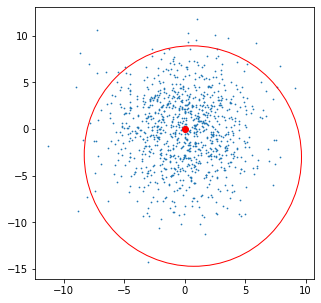

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
e.set_transform(custom_transform + ax.transData)

ax.add_patch(e)
ax.scatter(X,Y, s = 0.5)
ax.scatter([mu[0]], [mu[1]],c='red')

Now we will plot the marginal pdf on both X and Y along with the histograms.

In [121]:
sigmax = np.std(X, ddof=1)
sigmay = np.std(Y, ddof=1)

mean_x, mean_y, sigmax, sigmay

(-0.09876968048652182,
 -0.22082623498244072,
 2.9935466961386914,
 3.9352567180842897)

We can see above that our mean and standard deviation is nearly equal to what we wrote above.

Histogram of X

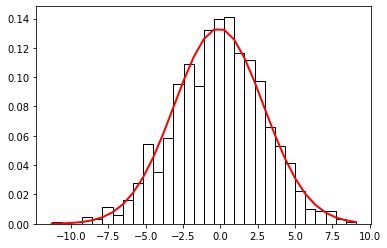

In [122]:
countx, binsx, ignoredx = plt.hist(X, 30, density=True, edgecolor = 'black', facecolor = 'None')
plt.plot(binsx, 1/(sigmax * np.sqrt(2 * np.pi)) *
               np.exp( - (binsx - mean_x)**2 / (2 * sigmax**2) ),
         linewidth=2, color='r')

Histogram of Y

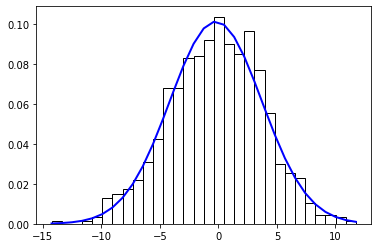

In [123]:
county, binsy, ignoredy = plt.hist(Y, 30, density=True, edgecolor = 'black', facecolor = 'None')
plt.plot(binsy, 1/(sigmay * np.sqrt(2 * np.pi)) *
               np.exp( - (binsy - mean_y)**2 / (2 * sigmay**2) ),
         linewidth=2, color='b')

Now that we have plotted everything we wanted in 2D, we will attempt the same in 3D.

Firstly, we will attempt to plot the scatter points and the ellipse on the XY plane.

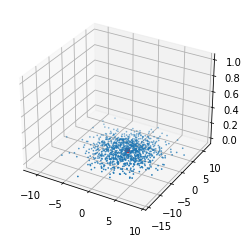

In [124]:
e2 = Ellipse((mean_x,mean_y), width = a * 2, height = b * 2, facecolor = 'none', edgecolor = 'red')
custom_transform = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scaling_factor_x , scaling_factor_y ) \
        .translate(mean_x, mean_y)
e2.set_transform(custom_transform + ax2.transData)

fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')

ax2.add_patch(e2)
art3d.pathpatch_2d_to_3d(e2, z=0, zdir="z")
ax2.scatter(X,Y, s=0.5)
ax2.scatter([mu[0]], [mu[1]],c='red')

plt.show()

We see here that the scatter points are plotted but there is some issue with the ellipse.

We can now try and plot the ellipse without the transformations and we will scale the major and minor axis length by their respective scaling factors.

(0.0, 3.0)

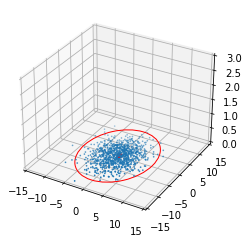

In [131]:
e3 = Ellipse((mean_x,mean_y), width = a * 2 * scaling_factor_x , height = b * 2 * scaling_factor_y , facecolor = 'none', edgecolor = 'red')

fig3 = plt.figure()
ax3 = fig3.add_subplot(projection='3d')

ax3.add_patch(e3)
art3d.pathpatch_2d_to_3d(e3, z=0, zdir="z")

ax3.scatter(X,Y, s=0.5)
ax3.scatter([mu[0]], [mu[1]],c='red')

ax3.set_xlim(-15, 15)
ax3.set_ylim(-15, 15)
ax3.set_zlim(0, 3)

We see that we can plot this ellipse here in this 3D plot but as soon as we apply our custom transformations, the ellipse is not visible.